In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('resource/Tensiometer 080921 summary 2ul.csv', sep=' ', header = None)
df.head()

,0,1,2,3,4,5,6
0,Contact,angle,[°],/,(9040MCC6,1),36.457
1,Contact,angle,[°],/,(9040MCC6,2),43.625
2,Contact,angle,[°],/,(9040MCC6,3),40.183
3,Contact,angle,[°],/,(9040MCC6,4),53.028
4,Contact,angle,[°],/,(9040MAST,1),43.574


In [32]:
df['Feature'] = df[4].str.replace('\(','', regex = True).str.strip()
df['Contact Angle (°)'] = df[6].astype(float)
df.head()

,0,1,2,3,4,5,6,Feature,Contact Angle (°)
0,Contact,angle,[°],/,(9040MCC6,1),36.457,9040MCC6,36.457
1,Contact,angle,[°],/,(9040MCC6,2),43.625,9040MCC6,43.625
2,Contact,angle,[°],/,(9040MCC6,3),40.183,9040MCC6,40.183
3,Contact,angle,[°],/,(9040MCC6,4),53.028,9040MCC6,53.028
4,Contact,angle,[°],/,(9040MAST,1),43.574,9040MAST,43.574


In [33]:
df = df.drop([0,1,2,3,4,5,6],axis = 1)
df = df.sort_values(['Feature'])
df.head()

,Feature,Contact Angle (°)
44,10035MAST,40.372
45,10035MAST,43.756
46,10035MAST,50.792
40,10035MCC6,47.818
42,10035MCC6,36.966


In [34]:
def addzero(item):
    if len(item) <5:
        return item
    elif item[0] is not '1':
        return ('0'+ item)
    else:
        return item

def power(item):
    if len(item) <5:
        return '0'
    else:
        return item[0:3]
    
def speed(item):
    if len(item) <5: 
        return '0'
    else:
        return item[3:5]
    
def feature(item):
    if len(item) <5:
        return item
    else:
        return item[5:]

power_feature= df['Feature'].apply(addzero)

In [35]:
#split out Power, Speed and Feature Name from 'Feature'

df['Power']=power_feature.apply(power).astype('int64')
df['Speed']=power_feature.apply(speed).astype('int64')
df['Contact Angle (°)'] = df['Contact Angle (°)'].astype(float)
df['Feature Name']=power_feature.apply(feature)



In [36]:
#Select one sorting type: by power or by feature

df = df.sort_values(['Power','Speed','Feature Name'])         #by Power
#df = df.sort_values(['Feature Name','Power','Speed'])         #by Feature
df.head()

,Feature,Contact Angle (°),Power,Speed,Feature Name
39,CTRL,50.898,0,0,CTRL
38,CTRL,30.882,0,0,CTRL
37,CTRL,51.185,0,0,CTRL
36,CTRL,43.508,0,0,CTRL
58,8040MAST,52.315,80,40,MAST


In [37]:
#Only includes Control and speed at 40
df = df[(df['Speed'] ==0) |(df['Speed'] ==40)]
df.head()

,Feature,Contact Angle (°),Power,Speed,Feature Name
39,CTRL,50.898,0,0,CTRL
38,CTRL,30.882,0,0,CTRL
37,CTRL,51.185,0,0,CTRL
36,CTRL,43.508,0,0,CTRL
58,8040MAST,52.315,80,40,MAST


(24.0, 75.0)

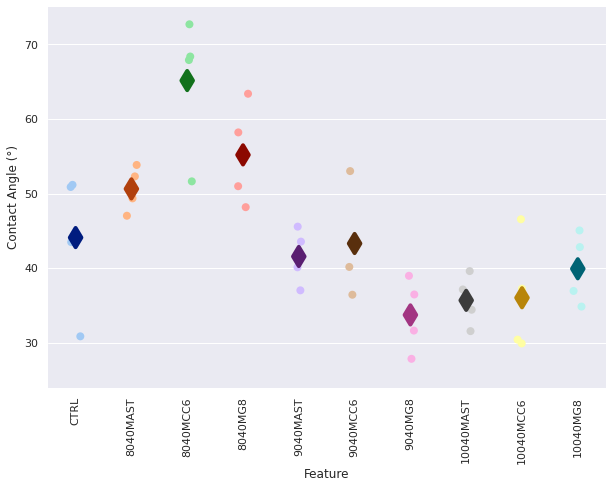

In [38]:
f, ax = plt.subplots()

sns.despine(bottom=True, left=True)


# Show each observation with a scatterplot
sns.stripplot(x="Feature", y="Contact Angle (°)",
              data=df, dodge=True, alpha=1, zorder=1, size=8, palette='pastel')

# Show the conditional means
sns.pointplot(x="Feature", y="Contact Angle (°)", 
              data=df, join=False, palette="dark",
              #dodge=0.532, 
              markers="d", 
              scale=2, 
              ci=None,
             )
plt.xticks(rotation=90)
sns.set(rc={'figure.figsize':(10,7)})
plt.ylim(24, 75)

In [26]:
pivot = df.groupby(['Power','Speed','Feature Name']).agg({'Contact Angle (°)':(np.nanmean, np.nanstd)}).round(1)
pivot

Contact Angle (°)       
                                   nanmean nanstd
Power Speed Feature Name                         
0     0     CTRL                      44.1    9.5
80    40    MAST                      50.6    3.0
            MCC6                      65.2    9.3
            MG8                       55.2    6.9
90    40    MAST                      41.6    3.8
            MCC6                      43.3    7.1
            MG8                       33.8    5.0
100   40    MAST                      35.7    3.5
            MCC6                      36.1    7.8
            MG8                       39.9    4.8

   
   
reshape pivot table to regular table

In [27]:
pivot.columns = pivot.columns.droplevel(0)
pivot = pivot.reset_index().rename_axis(None, axis=1)
pivot.head()

,Power,Speed,Feature Name,nanmean,nanstd
0,0,0,CTRL,44.1,9.5
1,80,40,MAST,50.6,3.0
2,80,40,MCC6,65.2,9.3
3,80,40,MG8,55.2,6.9
4,90,40,MAST,41.6,3.8


Remove control result for tablewise

In [28]:
pivot['Contact Angle (°)'] = pivot['nanmean'].astype(str)+' ('+pivot['nanstd'].astype(str)+')'
#pivot = pivot[pivot['Power'] > 0]
pivot.head()

,Power,Speed,Feature Name,nanmean,nanstd,Contact Angle (°)
0,0,0,CTRL,44.1,9.5,44.1 (9.5)
1,80,40,MAST,50.6,3.0,50.6 (3.0)
2,80,40,MCC6,65.2,9.3,65.2 (9.3)
3,80,40,MG8,55.2,6.9,55.2 (6.9)
4,90,40,MAST,41.6,3.8,41.6 (3.8)


In [29]:
pivot = pivot.pivot(index=['Power','Speed'],
                    columns='Feature Name',
                    values='Contact Angle (°)')
pivot

,Feature Name,CTRL,MAST,MCC6,MG8
Power,Speed,,,,
0,0,44.1 (9.5),NaN,NaN,NaN
80,40,NaN,50.6 (3.0),65.2 (9.3),55.2 (6.9)
90,40,NaN,41.6 (3.8),43.3 (7.1),33.8 (5.0)
100,40,NaN,35.7 (3.5),36.1 (7.8),39.9 (4.8)


In [30]:
#pivot.columns = pivot.columns.droplevel(0)
pivot = pivot.reset_index().rename_axis(None, axis=1)
pivot

,Power,Speed,CTRL,MAST,MCC6,MG8
0,0,0,44.1 (9.5),NaN,NaN,NaN
1,80,40,NaN,50.6 (3.0),65.2 (9.3),55.2 (6.9)
2,90,40,NaN,41.6 (3.8),43.3 (7.1),33.8 (5.0)
3,100,40,NaN,35.7 (3.5),36.1 (7.8),39.9 (4.8)


In [39]:
pivot.to_excel('Tensiometer result analysis 1ul 082721 by power_speed_feature.xlsx')

In [301]:
#using only one feature for 3D correlation

df_mast = df[df['Feature Name']=='MAST']
df_mcc6 = df[df['Feature Name']=='MCC6']
df_mg8 = df[df['Feature Name']=='MG8']
df_ctrl = df[df['Feature Name']=='CTRL']

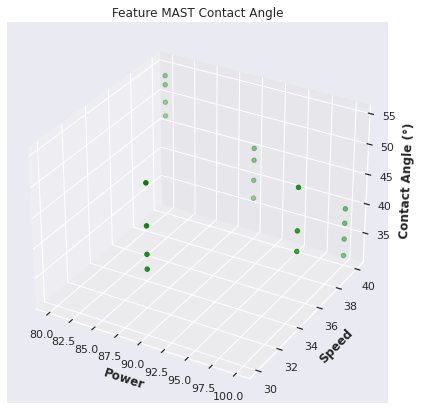

In [302]:
#3D ploting for MAST
#https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/

x = df_mast['Power']
y = df_mast['Speed']
z = df_mast['Contact Angle (°)']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Feature MAST Contact Angle")

ax.set_xlabel('Power', fontweight ='bold')
ax.set_ylabel('Speed', fontweight ='bold')
ax.set_zlabel('Contact Angle (°)', fontweight ='bold')
 
# show plot
plt.show()


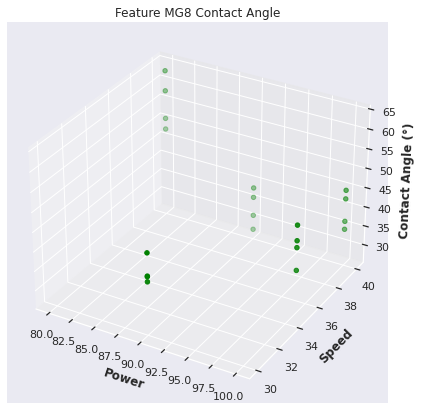

In [303]:
#3D ploting for MG8
#https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/

x = df_mg8['Power']
y = df_mg8['Speed']
z = df_mg8['Contact Angle (°)']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Feature MG8 Contact Angle")

ax.set_xlabel('Power', fontweight ='bold')
ax.set_ylabel('Speed', fontweight ='bold')
ax.set_zlabel('Contact Angle (°)', fontweight ='bold')
 
# show plot
plt.show()


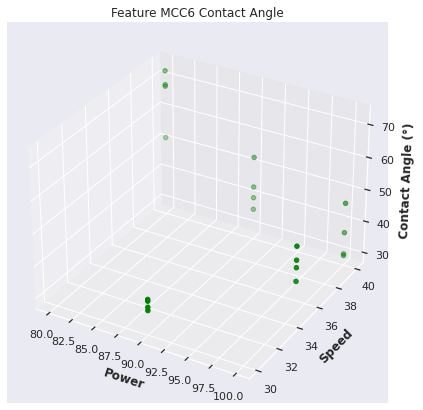

In [304]:
#3D ploting for MCC6
#https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/

x = df_mcc6['Power']
y = df_mcc6['Speed']
z = df_mcc6['Contact Angle (°)']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Feature MCC6 Contact Angle")

ax.set_xlabel('Power', fontweight ='bold')
ax.set_ylabel('Speed', fontweight ='bold')
ax.set_zlabel('Contact Angle (°)', fontweight ='bold')
 
# show plot
plt.show()


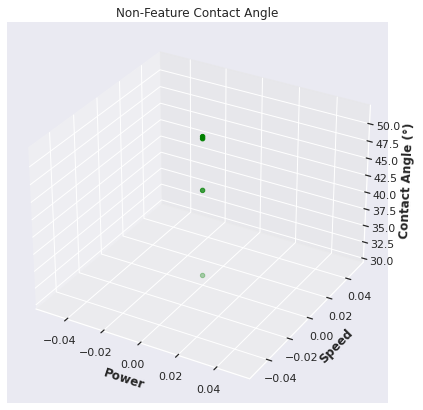

In [305]:
#3D ploting for CTRL
#https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/

x = df_ctrl['Power']
y = df_ctrl['Speed']
z = df_ctrl['Contact Angle (°)']

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("Non-Feature Contact Angle")

ax.set_xlabel('Power', fontweight ='bold')
ax.set_ylabel('Speed', fontweight ='bold')
ax.set_zlabel('Contact Angle (°)', fontweight ='bold')
 
# show plot
plt.show()